In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
len(data)

284807

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


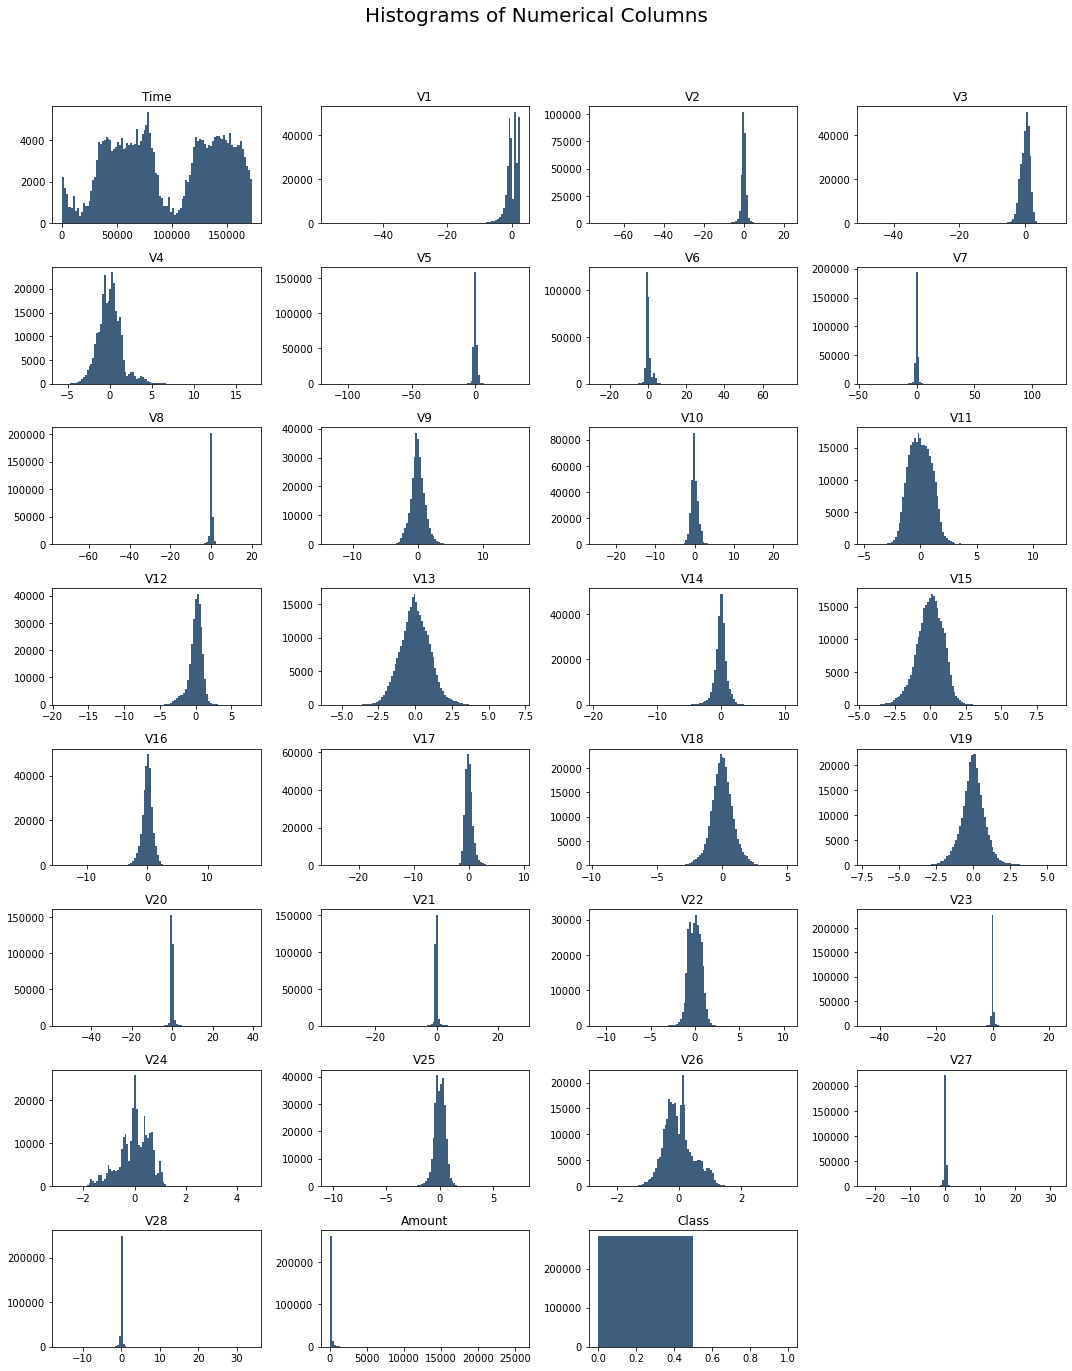

In [6]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- we can observe a large prevalence of Class 0 (non fraudulent).

In [7]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


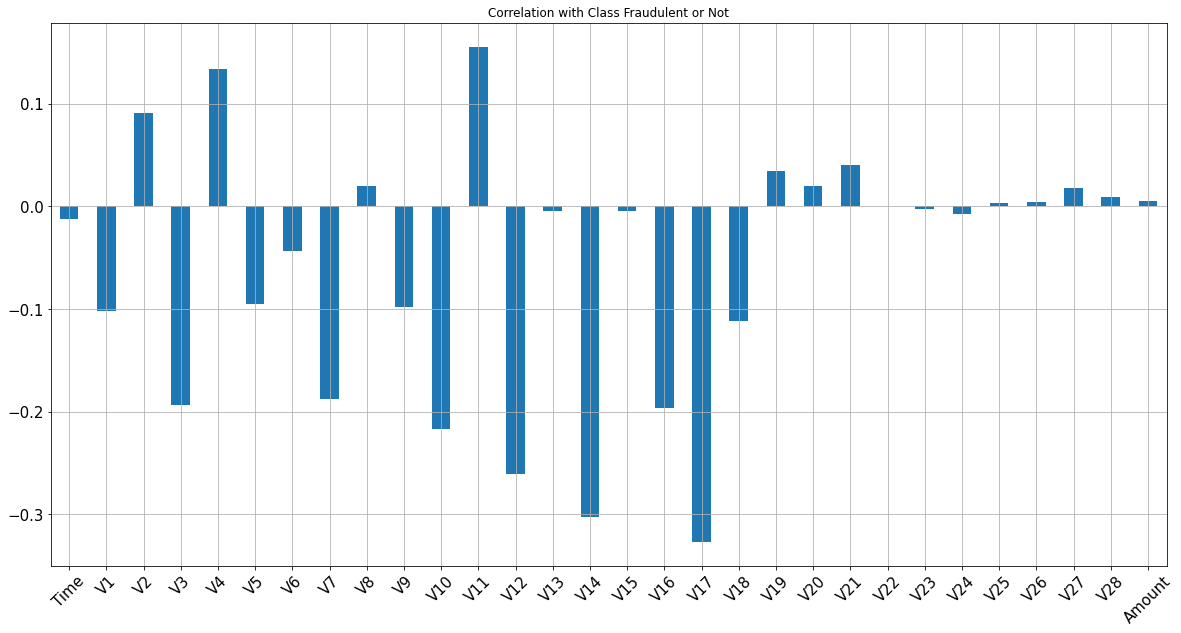

In [8]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-processing

In [9]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [11]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not

In [13]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [15]:
X_train.shape

(199364, 29)

In [16]:
X_test.shape

(85443, 29)

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
random_forest = RandomForestClassifier(n_estimators=100)

In [19]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [20]:
y_pred = random_forest.predict(X_test)

In [21]:
random_forest.score(X_test,y_test)

0.9995435553526912

In [22]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


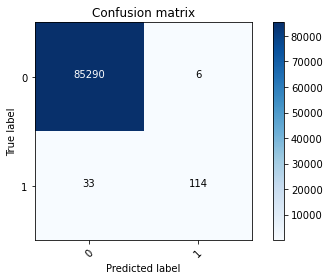

In [23]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- while only 6 regular transactions are wrongly predicted as fraudulent, the model only detects 78% of the fraudulent transactions. As a consequence 33 fraudulent transactions are not detected (False Negatives).
- Let's see if we can improve this performance with other machine learning / deep learning models in the rest of the notebook.

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9995 	precision:0.9500 	recall:0.7755 	F1-score:0.8539


In [25]:
from sklearn.metrics import RocCurveDisplay

Let's store each model's performance in a dataframe for comparison purpose

In [26]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.22449,0.77551,0.95,0.853933


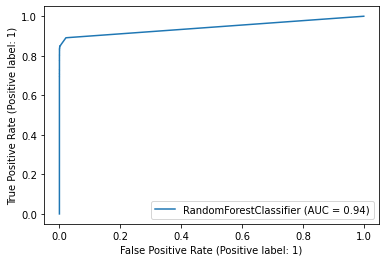

In [27]:
ROC_RF = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

We will run the models on the full dataset to check.

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


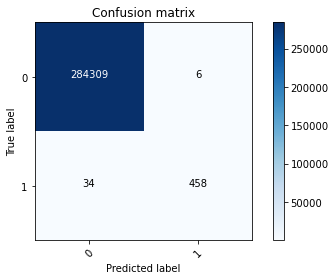

In [28]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [29]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9999 	precision:0.9871 	recall:0.9309 	F1-score:0.9582


In [30]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99986,0.069106,0.930894,0.987069,0.958159


## Decision trees

In [31]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [32]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [33]:
y_pred = decision_tree.predict(X_test)

In [34]:
decision_tree.score(X_test,y_test)

0.9992392589211521

Confusion matrix, without normalization
[[85267    29]
 [   36   111]]


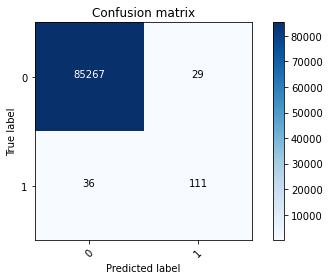

In [35]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- The performance of the Decision Tree model is below the one using Random Forest. Let's check the performance indicators.

In [36]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [37]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519


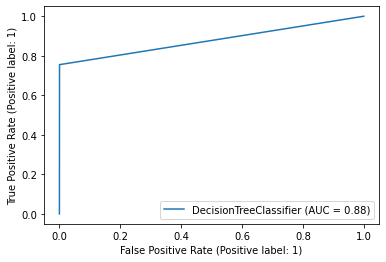

In [38]:
ROC_DT = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


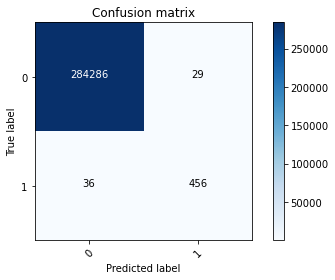

In [39]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [40]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [41]:
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470


## Let's now explore Neural Network models

In [42]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network
- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).
- a dropout step is included to prevent overfitting.

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [44]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
______________________________________________________

## Training

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0082 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0034 - accuracy: 0.9993 0s - loss: 0.003
Epoch 5/5
13291/13291 [==============================] - 31s 2ms/step - loss: 0.0032 - accuracy: 0.9993


In [47]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0037 - accuracy: 0.9994


In [48]:
print(score)

[0.0037334964144974947, 0.9993914365768433]


- The model achieves an accuracy of 99.94% ! Is this a good performance ?
- Remember that our dataset is significantly composed of non fraudulent samples with only 172 fraudulent transactions per 100,000. Consequently, a model predicting every transaction as 'non fraudulent' would achieve 99.83% accuracy despite being unable to detect a single fraudulent case !

Test Data Accuracy: 0.9994


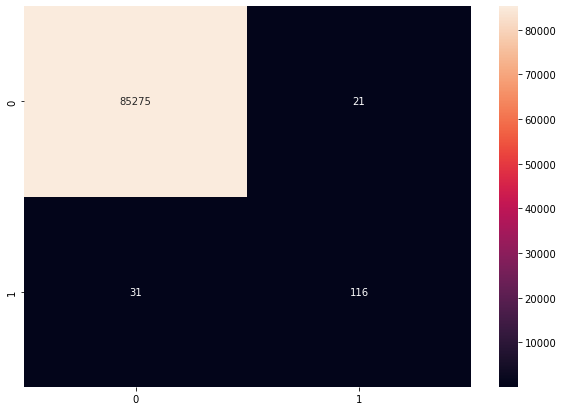

In [49]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Detection of fraudulent transactions did not improve compared to the previous machine learning models.
- 115 fraudulent transactions are detected as fraudulent by the model, yet 32 fraudulent transactions are not identified (false negative) which remains an issue. Our objective must be to detect as many fraudulent transactions as possible since these can have a huge negative impact.
- 21 regular transactions are detected as potentially fraudulent by the model. These are false positive. This number is negligible.

Conclusion : We must find ways to further reduce the number of false negative.

In [50]:
# Alternative approach to plot confusion matrix (from scikit-learn.org site)
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)    # Pandas format required by confusion_matrix function

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   # y_pred.round() to convert probability to either 0 or 1 in line with y_test

In [52]:
print(cnf_matrix)

[[85275    21]
 [   31   116]]


Confusion matrix, without normalization
[[85275    21]
 [   31   116]]


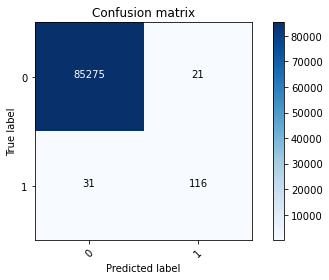

In [53]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [54]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [55]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901


Confusion matrix, without normalization
[[284240     75]
 [    94    398]]


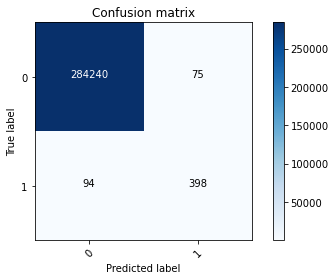

In [56]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [57]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [58]:
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870


### Weighted loss to account for large class imbalance in train dataset
- we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection. Let's review the process:

In [59]:
classes = [0, 1]

In [60]:
classes=np.array(classes)

In [61]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=np.array([y_train[i][0] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.500866751415694, 1: 288.93333333333334}

- The class 'Fraudulent' (y=1) is assigned a weight of 289 vs 0.5 for the class 'not fraudulent' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent cases during training.

In [62]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Epoch 1/5
13291/13291 [==============================] - 54s 4ms/step - loss: 0.2848 - accuracy: 0.9798
Epoch 2/5
13291/13291 [==============================] - 53s 4ms/step - loss: 0.5250 - accuracy: 0.9826
Epoch 3/5
13291/13291 [==============================] - 53s 4ms/step - loss: 0.4170 - accuracy: 0.9664
Epoch 4/5
13291/13291 [==============================] - 54s 4ms/step - loss: 0.3195 - accuracy: 0.9630
Epoch 5/5
13291/13291 [==============================] - 52s 4ms/step - loss: 0.3351 - accuracy: 0.9702


In [63]:
score_weighted = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 5s 2ms/step - loss: 0.0399 - accuracy: 0.9887


In [64]:
print(score_weighted)

[0.039931658655405045, 0.9887410402297974]


Test Data Accuracy: 0.9887


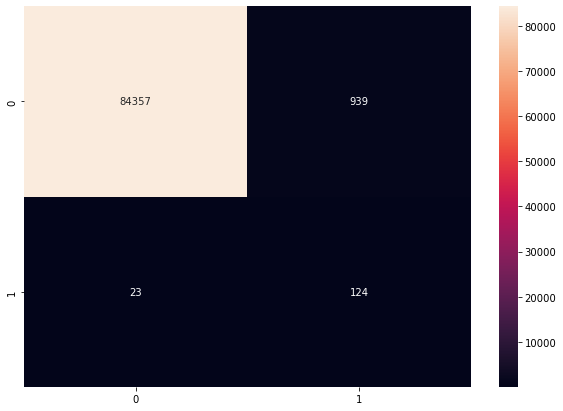

In [65]:
## Confusion Matrix on unseen test set
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

- The accuracy reduced a bit. We need to look at more detailed evaluation measures like precision and recall to gauge the true model performance.
- The model is actually much better at detecting fraudulent cases now. We have a lower False negative rate which is the key criteria for our purpose (detect a fraud when there is one).
- But on the other hand, the model generates an excessive number of false positive compared to the previous approaches. 

In [66]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [67]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901
3,WeightedNeuralNetwork,0.988741,0.156463,0.843537,0.116651,0.204959


- Although the recall metric improves, the F1-score collapses due to extremely poor precision. Given the very high number of transactions processed, the excessive number of false positives is clearly an issue.

Confusion matrix, without normalization
[[281235   3080]
 [    48    444]]


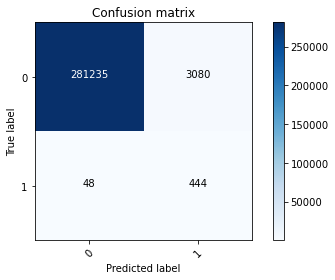

In [68]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [69]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [70]:
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870
3,WeightedNeuralNetwork,0.989017,0.097561,0.902439,0.125993,0.221116


## Undersampling
- In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [71]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [72]:
normal_indices = data[data.Class == 0].index

In [73]:
len(normal_indices)

284315

In [74]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [75]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [76]:
under_sample_data = data.iloc[under_sample_indices,:]

In [77]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [79]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
______________________________________________________

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.8404 - accuracy: 0.9506
Epoch 2/5
46/46 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.9331
Epoch 3/5
46/46 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.9506
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.9506
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.9491


Confusion matrix, without normalization
[[141   5]
 [  6 144]]


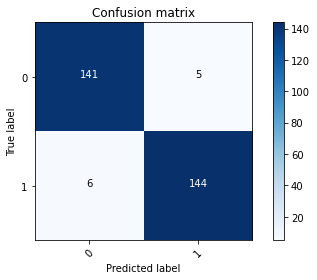

In [82]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- The metrics look pretty strong on the test set....

In [83]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [84]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901
3,WeightedNeuralNetwork,0.988741,0.156463,0.843537,0.116651,0.204959
4,UnderSampledNeuralNetwork,0.962838,0.040000,0.960000,0.966443,0.963211


....But the model fails on non fraudulent transactions as shown below.

Confusion matrix, without normalization
[[275043   9272]
 [    18    474]]


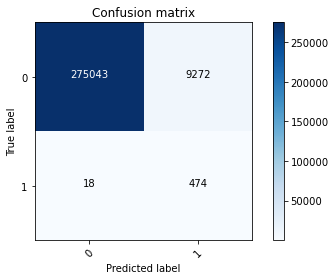

In [85]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [86]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [87]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870
3,WeightedNeuralNetwork,0.989017,0.097561,0.902439,0.125993,0.221116
4,UnderSampledNeuralNetwork,0.967381,0.036585,0.963415,0.048635,0.092596


## Oversampling technique using SMOTE
(Synthetic Minority Oversample TEchnique)
- the alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one.
- This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [90]:
y_resample

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [91]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]), 
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  284315


In [92]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [94]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [95]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [96]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 64s 2ms/step - loss: 0.0438 - accuracy: 0.9839 0s - loss: 0.0438 - accuracy: 0.
Epoch 2/5
26537/26537 [==============================] - 63s 2ms/step - loss: 0.0191 - accuracy: 0.9946
Epoch 3/5
26537/26537 [==============================] - 65s 2ms/step - loss: 0.0150 - accuracy: 0.9958
Epoch 4/5
26537/26537 [==============================] - 60s 2ms/step - loss: 0.0129 - accuracy: 0.9967
Epoch 5/5
26537/26537 [==============================] - 64s 2ms/step - loss: 0.0118 - accuracy: 0.9971


Confusion matrix, without normalization
[[84989   264]
 [   83 85253]]


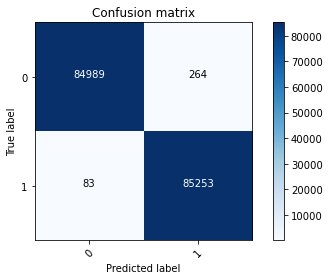

In [97]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the unseen test set.

In [98]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [99]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901
3,WeightedNeuralNetwork,0.988741,0.156463,0.843537,0.116651,0.204959
4,UnderSampledNeuralNetwork,0.962838,0.040000,0.960000,0.966443,0.963211
5,OverSampledNeuralNetwork,0.997966,0.000973,0.999027,0.996913,0.997969


All metrics are excellent for this last model.

Confusion matrix, without normalization
[[283579    736]
 [     2    490]]


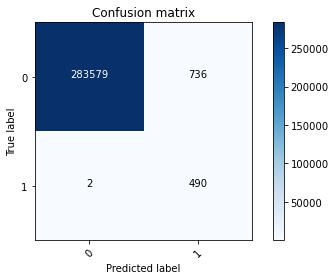

In [100]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.
- Notice the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement

In [101]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [102]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870
3,WeightedNeuralNetwork,0.989017,0.097561,0.902439,0.125993,0.221116
4,UnderSampledNeuralNetwork,0.967381,0.036585,0.963415,0.048635,0.092596
5,OverSampledNeuralNetwork,0.997409,0.004065,0.995935,0.399674,0.570431


# Gradient Boosting Classifier with Under Sampling

In [103]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
# Load the credit card dataset
df = pd.read_csv("creditcard.csv")

In [105]:
# Separate the features and target variable
X = df.drop("Class", axis=1)
y = df["Class"]

In [106]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Apply Random Under Sampler to undersample the non-fraud data
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [108]:
# Train a Gradient Boosting Classifier on the balanced dataset
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [109]:
# Predict on the test set
y_pred = clf.predict(X_test)
# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9389066395140621
Confusion Matrix:
 [[53390  3474]
 [    6    92]]


In [110]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

Confusion matrix, without normalization
[[53390  3474]
 [    6    92]]


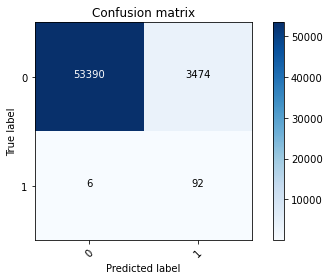

In [111]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [112]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['GBCUnderSampled', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901
3,WeightedNeuralNetwork,0.988741,0.156463,0.843537,0.116651,0.204959
4,UnderSampledNeuralNetwork,0.962838,0.040000,0.960000,0.966443,0.963211
5,OverSampledNeuralNetwork,0.997966,0.000973,0.999027,0.996913,0.997969
6,GBCUnderSampled,0.938907,0.061224,0.938776,0.025799,0.050218


Confusion matrix, without normalization
[[267149  17166]
 [     6    486]]


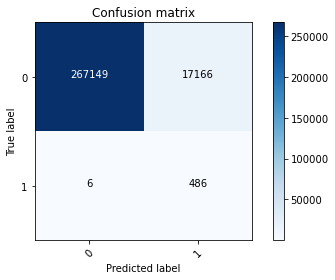

In [113]:
# Confusion matrix on the whole dataset
y_pred = clf.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [114]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [115]:
model_results = pd.DataFrame([['GBCUnderSampled', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870
3,WeightedNeuralNetwork,0.989017,0.097561,0.902439,0.125993,0.221116
4,UnderSampledNeuralNetwork,0.967381,0.036585,0.963415,0.048635,0.092596
5,OverSampledNeuralNetwork,0.997409,0.004065,0.995935,0.399674,0.570431
6,GBCUnderSampled,0.939707,0.012195,0.987805,0.027532,0.053571


# Gradient Boosting Classifier with Over Sampling using SMOTE

In [116]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [117]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3, random_state=42)

In [119]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [120]:
# Train a Gradient Boosting Classifier on the balanced dataset
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [121]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [122]:
# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.986089372702812
Confusion Matrix:
 [[84287   862]
 [ 1511 83929]]


Confusion matrix, without normalization
[[84287   862]
 [ 1511 83929]]


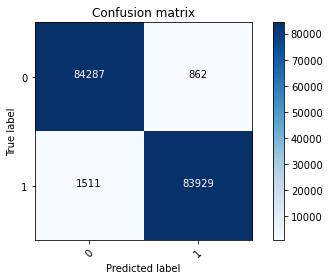

In [123]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [124]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9861 	precision:0.9898 	recall:0.9823 	F1-score:0.9861


In [125]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['GBCOverSampled', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901
3,WeightedNeuralNetwork,0.988741,0.156463,0.843537,0.116651,0.204959
4,UnderSampledNeuralNetwork,0.962838,0.040000,0.960000,0.966443,0.963211
5,OverSampledNeuralNetwork,0.997966,0.000973,0.999027,0.996913,0.997969
6,GBCUnderSampled,0.938907,0.061224,0.938776,0.025799,0.050218
7,GBCOverSampled,0.986089,0.017685,0.982315,0.989834,0.986060


C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Confusion matrix, without normalization
[[281649   2666]
 [    44    448]]


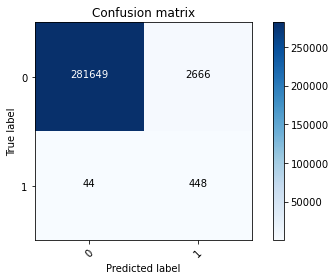

In [126]:
# Confusion matrix on the whole dataset
y_pred = clf.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [127]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [128]:
model_results = pd.DataFrame([['GBCOverSampled', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870
3,WeightedNeuralNetwork,0.989017,0.097561,0.902439,0.125993,0.221116
4,UnderSampledNeuralNetwork,0.967381,0.036585,0.963415,0.048635,0.092596
5,OverSampledNeuralNetwork,0.997409,0.004065,0.995935,0.399674,0.570431
6,GBCUnderSampled,0.939707,0.012195,0.987805,0.027532,0.053571
7,GBCOverSampled,0.990485,0.089431,0.910569,0.143866,0.248475


# CNN

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [130]:
# Load the credit card dataset
df = pd.read_csv("creditcard.csv")

# Separate the features and target variable
X = df.drop("Class", axis=1)
y = df["Class"]

In [131]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the data for CNN input
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=X_train[0].shape))
model.add(Conv1D(filters=16, kernel_size=3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=15, callbacks=[early_stopping])

# Evaluate the performance of the model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))


Epoch 1/5
13291/13291 [==============================] - 64s 5ms/step - loss: 0.1065 - accuracy: 0.9979 - val_loss: 0.0122 - val_accuracy: 0.9984
Epoch 2/5
13291/13291 [==============================] - 54s 4ms/step - loss: 0.0185 - accuracy: 0.9982 - val_loss: 0.0116 - val_accuracy: 0.9985
Epoch 3/5
13291/13291 [==============================] - 48s 4ms/step - loss: 0.0207 - accuracy: 0.9982 - val_loss: 0.0083 - val_accuracy: 0.9987
Epoch 4/5
13291/13291 [==============================] - 52s 4ms/step - loss: 0.0274 - accuracy: 0.9985 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 5/5
2671/2671 [==============================] - 5s 2ms/step - loss: 0.0066 - accuracy: 0.9987
Accuracy: 99.87%


In [132]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generate predictions on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Generate classification report
cr = classification_report(y_test, y_pred)
# Generate accuracy score
acc = accuracy_score(y_test, y_pred)
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.24      0.38       136

    accuracy                           1.00     85443
   macro avg       0.92      0.62      0.69     85443
weighted avg       1.00      1.00      1.00     85443



Confusion matrix, without normalization
[[85301     6]
 [  103    33]]


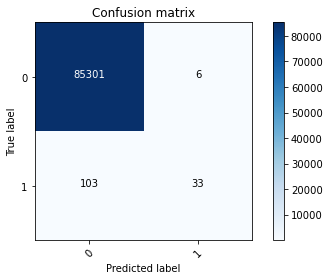

In [133]:
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284292     23]
 [   383    109]]


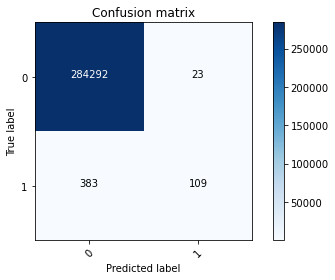

In [134]:
# Confusion matrix on the whole dataset
X = X.values.reshape(X.shape[0], X.shape[1], 1)
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## Oversampling technique using SMOTE with CNN

In [135]:
from imblearn.over_sampling import SMOTE

In [136]:
# Load the data
data = pd.read_csv('creditcard.csv')

In [137]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [138]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not

In [139]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [140]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [142]:
# Reshape the data for CNN input
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=X_train[0].shape))
model.add(Conv1D(filters=16, kernel_size=3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(24, activation="relu"))
model.add(Dense(24, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [143]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 27, 32)            128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 25, 16)            1552      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 24)                4632      
_________________________________________________________________
dense_14 (Dense)             (None, 24)                600       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)               

In [144]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=15, callbacks=[early_stopping])

# Evaluate the performance of the model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy*100))

Epoch 1/5
26537/26537 [==============================] - 104s 4ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0087 - val_accuracy: 0.9977
Epoch 2/5
26537/26537 [==============================] - 103s 4ms/step - loss: 0.0146 - accuracy: 0.9965 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 3/5
26537/26537 [==============================] - 96s 4ms/step - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0091 - val_accuracy: 0.9976
Epoch 4/5
26537/26537 [==============================] - 97s 4ms/step - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.0050 - val_accuracy: 0.9990
Epoch 5/5
5331/5331 [==============================] - 12s 2ms/step - loss: 0.0054 - accuracy: 0.9986
Accuracy: 99.86%


Confusion matrix, without normalization
[[85328   226]
 [   11 85024]]


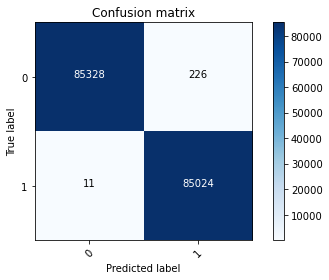

In [145]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [146]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [147]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['CNNOverSampled', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = results_testset.append(model_results, ignore_index = True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999544,0.224490,0.775510,0.950000,0.853933
1,DecisionTree,0.999239,0.244898,0.755102,0.792857,0.773519
2,PlainNeuralNetwork,0.999391,0.210884,0.789116,0.846715,0.816901
3,WeightedNeuralNetwork,0.988741,0.156463,0.843537,0.116651,0.204959
4,UnderSampledNeuralNetwork,0.962838,0.040000,0.960000,0.966443,0.963211
5,OverSampledNeuralNetwork,0.997966,0.000973,0.999027,0.996913,0.997969
6,GBCUnderSampled,0.938907,0.061224,0.938776,0.025799,0.050218
7,GBCOverSampled,0.986089,0.017685,0.982315,0.989834,0.986060
8,CNNOverSampled,0.998611,0.000129,0.999871,0.997349,0.998608


Confusion matrix, without normalization
[[283615    700]
 [     1    491]]


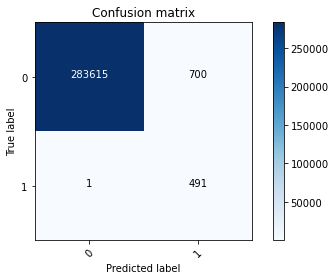

In [148]:
X = X.values.reshape(X.shape[0], X.shape[1], 1)
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [149]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [150]:
model_results = pd.DataFrame([['UsingCNNOverSampled', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = results_fullset.append(model_results, ignore_index = True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999860,0.069106,0.930894,0.987069,0.958159
1,DecisionTree,0.999772,0.073171,0.926829,0.940206,0.933470
2,PlainNeuralNetwork,0.999407,0.191057,0.808943,0.841438,0.824870
3,WeightedNeuralNetwork,0.989017,0.097561,0.902439,0.125993,0.221116
4,UnderSampledNeuralNetwork,0.967381,0.036585,0.963415,0.048635,0.092596
5,OverSampledNeuralNetwork,0.997409,0.004065,0.995935,0.399674,0.570431
6,GBCUnderSampled,0.939707,0.012195,0.987805,0.027532,0.053571
7,GBCOverSampled,0.990485,0.089431,0.910569,0.143866,0.248475
8,UsingCNNOverSampled,0.997539,0.002033,0.997967,0.412259,0.583482
